## Code to generate figures of tSNE and UMAP for Samusik01

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from matplotlib.collections import LineCollection

#### Import the data from previously run UMAP and tSNE, as wel as read in the population assignments (for coloring)

In [2]:
s01_umap = np.load("Embeddings/s01_umap.npy")
s01_tsne = np.load("Embeddings/s01_tsne.npy")
s01_pca = np.load("Embeddings/s01_pca.npy")
s01_2layer = np.load("Embeddings/s01_2layer.npy")
s01_6layer = np.load("Embeddings/s01_6layer.npy")
s01_vae = np.load("Embeddings/s01_vae.npy")
PopData = pd.read_csv("SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

#### Here I define my own color_map - feel free to change the colors as you wish. Since 0 is unlabeled event I put it as beige

In [3]:
color_list = ["beige","violet","red","blue","lightsalmon", "green","orchid", "darkred", 'olivedrab', 'palegreen', 'gold', 'tan', 'slategray','lemonchiffon', "paleturquoise","pink","crimson","orange","mediumvioletred","lightskyblue","navajowhite","sienna","springgreen","black","purple"]
cmap_own = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
colors = []
for i in range(len(Assignments)):
    colors.append(color_list[Assignments.astype(int)[i]])

### Generate the Legend for all Plots

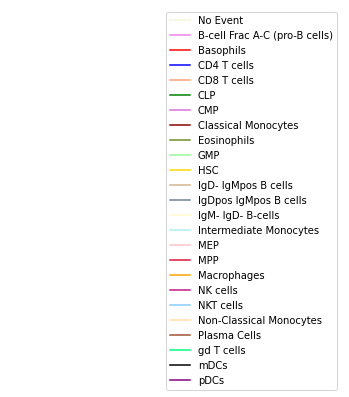

In [15]:
N = 25
x = np.arange(N)
# Here are many sets of y to plot vs. x
ys = [x + i for i in x]
cell_assignments = pd.read_csv("SamusikData/PopulationDescription.csv")
# We need to set the plot limits, they will not autoscale
fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))
for i in range(N):
    plt.plot(x, ys[i], label = str(i), c = color_list[i])
plt.legend(cell_assignments["Population"])
plt.gca().set_axis_off()
plt.xlim([-10000,-10])
plt.ylim([10000000,1000000000])
plt.savefig("Figures/Legend.png", bbox_inches = 'tight')

### UMAP Plotting

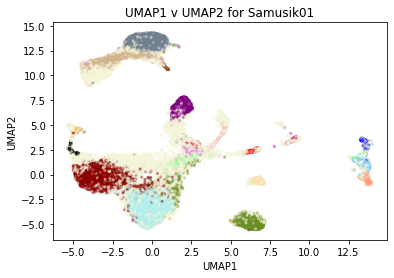

In [4]:
plt.scatter(s01_umap[:, 0], s01_umap[:, 1], c = colors,s=5, alpha=0.4)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP1 v UMAP2 for Samusik01")
plt.savefig("Figures/s01_umap.png")
plt.show()


### tSNE Plotting

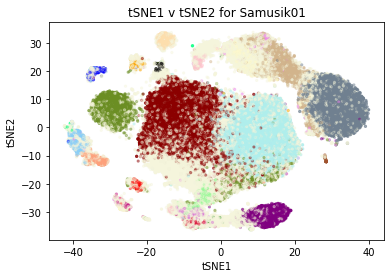

In [5]:
plt.scatter(s01_tsne[:, 0], s01_tsne[:, 1], c = colors,s=5, alpha=0.4)
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("tSNE1 v tSNE2 for Samusik01")
plt.savefig("Figures/s01_tsne.png")
plt.show()

### PCA Plotting

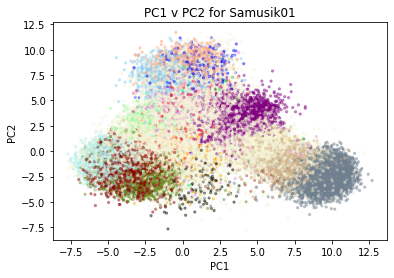

In [6]:
plt.scatter(s01_pca[:, 0], s01_pca[:, 1], c = colors,s=5, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 v PC2 for Samusik01")
plt.savefig("Figures/s01_pca.png")
plt.show()

### Autoencoder - 2 Layer Plotting

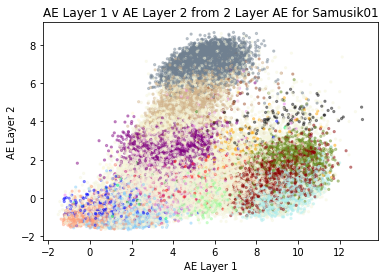

In [7]:
plt.scatter(s01_2layer[:, 0], s01_2layer[:, 1], c = colors,s=5, alpha=0.4)
plt.xlabel("AE Layer 1")
plt.ylabel("AE Layer 2")
plt.title("AE Layer 1 v AE Layer 2 from 2 Layer AE for Samusik01")
plt.savefig("Figures/s01_2layer.png")
plt.show()

### Autoencoder - 6 Layer Plotting

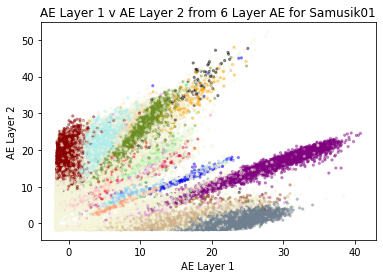

In [8]:
plt.scatter(s01_6layer[:, 0], s01_6layer[:, 1], c = colors,s=5, alpha=0.4)
plt.xlabel("AE Layer 1")
plt.ylabel("AE Layer 2")
plt.title("AE Layer 1 v AE Layer 2 from 6 Layer AE for Samusik01")
plt.savefig("Figures/s01_6layer.png")
plt.show()

### Variational Autoencoder Plotting

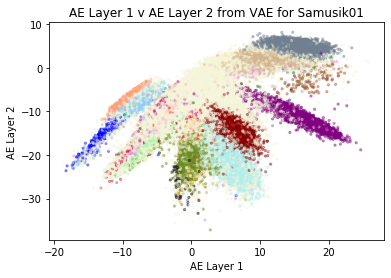

In [9]:
plt.scatter(s01_vae[:, 0], s01_vae[:, 1], c = colors,s=5, alpha=0.4)
plt.xlabel("AE Layer 1")
plt.ylabel("AE Layer 2")
plt.title("AE Layer 1 v AE Layer 2 from VAE for Samusik01")
plt.savefig("Figures/s01_vae.png")
plt.show()